# 🏡 Boston Housing – 주택 가격 예측 (Regression)
🎯 지역의 특성(범죄율, 방 개수, 교통 접근성 등)을 바탕으로 주택 가격을 예측하는 회귀 문제

## ✅ 1. 데이터 전처리

In [3]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("/Users/lee_hyejoo/Desktop/hyejoo/학교/3학년 1학기/머신러닝/중간_대체/주택_가격_예측, Boston Housing - Regression/HousingData.csv")

# 상위 5개 샘플 확인
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### 📌 1-1. 결측치 처리

In [4]:
# 결측치 개수 확인
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
# 평균값으로 결측치 대체
df.fillna(df.mean(), inplace=True)

### 📌 1-2. 이상치 탐지 및 제거 (Z-score 기준)

In [6]:
from scipy import stats
import numpy as np

# 입력과 타겟 분리
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Z-score 계산
z_scores = np.abs(stats.zscore(X))

# 이상치 기준 설정: Z-score < 3인 데이터만 사용
mask = (z_scores < 3).all(axis=1)

# 이상치 제거된 데이터
X_clean = X[mask]
y_clean = y[mask]


💡 설명
- Z-score가 ±3을 초과하는 샘플을 이상치로 판단하고 제거함
- 이상치는 특히 회귀 문제에서 모델 계수를 왜곡시킬 수 있으므로 사전에 반드시 제거하는 것이 중요함

### 📌 1-3. 특성 정규화 (Min-Max Scaling)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_clean)

💡 설명
- 이상치를 제거한 후 정규화를 적용해야 스케일링이 왜곡되지 않음
- 이상치가 포함된 상태에서 MinMax를 쓰면 0~1 범위가 의미가 없어짐

---

## 🤖 2. 모델 학습 및 비교

### 📌 2-1. 데이터 분할

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_clean, test_size=0.2, random_state=42
)

### 📌 2-2. 기본 모델 - 다중 선형 회귀 (Linear Regression)
- 가장 기본적인 회귀 모델로, 입력 특성과 출력이 선형적인 관계에 있다고 가정

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 모델 정의 및 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 예측
y_pred_lr = lr_model.predict(X_test)

---

### 📌 2-3. 고급 모델 - Random Forest 

In [10]:
from sklearn.ensemble import RandomForestRegressor

# 모델 정의 및 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

### 📌 2-4. 고급 모델 - XGBoost

In [11]:
import xgboost as xgb

# 모델 정의 및 학습
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

### 📌 2-5. 고급 모델 - LightGBM
- Gradient Boosting 계열 중 하나로, 속도와 메모리 효율성이 뛰어나고, 대규모 데이터셋에도 적합한 모델임
- 대량의 feature나 데이터가 많을 때 성능을 극대화할 수 있는 구조

In [ ]:
# import sys
# !{sys.executable} -m pip install lightgbm


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip


In [13]:
import lightgbm as lgb

# 모델 정의 및 학습
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# 예측
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 322, number of used features: 12
[LightGBM] [Info] Start training from score 22.096894
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

---

### 🧠 2.6 딥러닝 모델 - MLP

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# 모델 정의
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)  # 회귀 문제는 활성화 함수 없음
])

# 컴파일
mlp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 학습
history = mlp_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

# MLP 예측
y_pred_mlp = mlp_model.predict(X_test).flatten()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


---

## 📊 3. 모델 평가

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# MSE & R² 계산
mse_list = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_xgb),
    mean_squared_error(y_test, y_pred_lgb),
    mean_squared_error(y_test, y_pred_mlp)
]

r2_list = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_xgb),
    r2_score(y_test, y_pred_lgb),
    r2_score(y_test, y_pred_mlp)
]

# 모델명
models = [
    "Linear Regression",
    "Random Forest",
    "XGBoost",
    "LightGBM",
    "MLP (Deep Learning)"
]

In [20]:
# 결과 표 생성
results_df = pd.DataFrame({
    "Model": models,
    "MSE": mse_list,
    "R² Score": r2_list
})

# 소수점 3자리로 반올림
results_df = results_df.round(3)

# 결과 출력
results_df

,Model,MSE,R² Score
0,Linear Regression,23.300,0.635
1,Random Forest,16.017,0.749
2,XGBoost,16.459,0.742
3,LightGBM,17.041,0.733
4,MLP (Deep Learning),17.729,0.722


📈 해석
- 가장 낮은 MSE와 가장 높은 R² Score를 기록한 모델은 Random Forest로, 전반적으로 가장 안정적인 성능을 보임
- XGBoost와 LightGBM도 성능이 유사하며, 약간의 튜닝으로 더 개선 가능성 있음
- Linear Regression은 단순하지만 성능은 다소 낮음 → 비교 기준 모델로 적절
- 딥러닝(MLP)은 비선형 패턴을 학습할 수 있지만 데이터가 비교적 작고 구조가 단순해서 큰 성능 우위는 보이지 않음

➡️ 정확한 예측이 필요한 경우에는 Random Forest 또는 XGBoost를 사용하는 것이 효과적이며, 모델 해석이 중요한 상황에서는 Linear Regression도 유용할 수 있음

---

## 🔎 추가 분석 + 📊 시각화

### 1. 🧮 예측 오차 분석 (Residual Plot)

💡 분석 배경
- 모델의 성능을 MSE와 R² Score로 평가하는 것만으로는 예측이 특정 구간에서만 잘 되었는지, 또는 과소/과대 예측이 반복되는 경향이 있는지를 파악하기 어렵다고 판단
- 예측값과 실제값의 차이인 잔차(Residuals) 를 시각화하여, 모델이 어떤 영역에서 얼마나 일관성 있게 예측을 수행했는지를 확인하고자 함

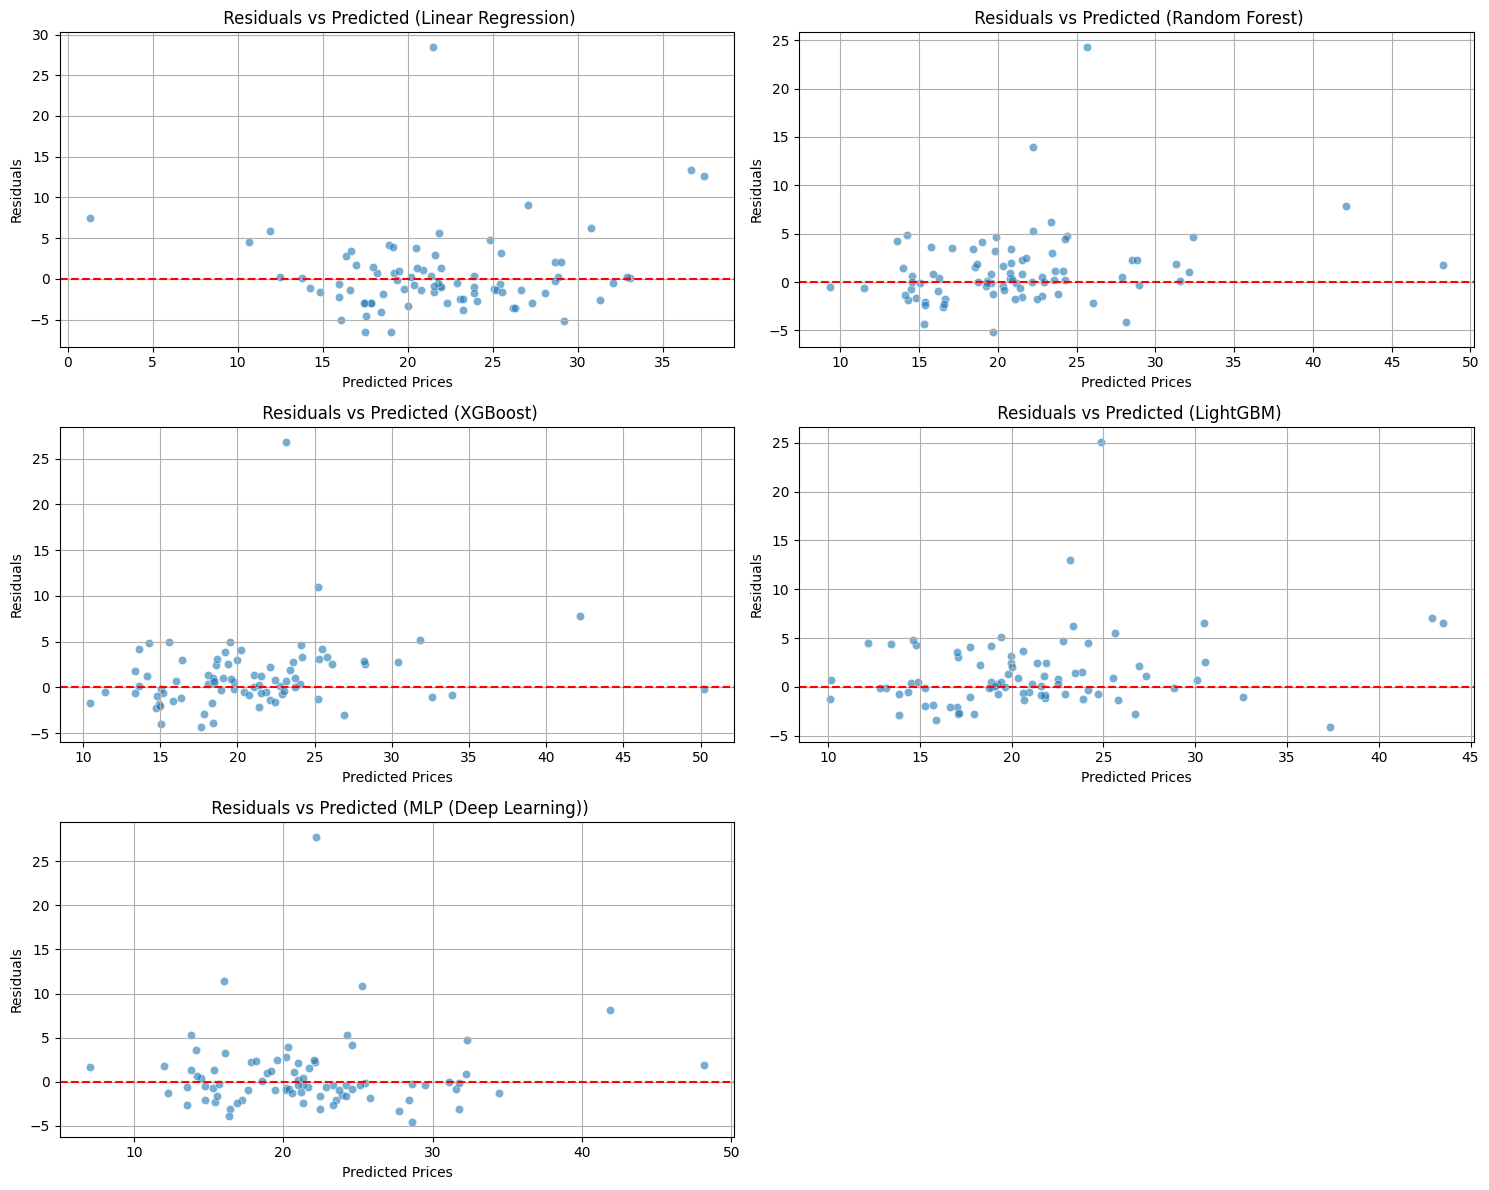

In [35]:
# 모델별 예측값
preds = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgb,
    "MLP (Deep Learning)": y_pred_mlp
}

# 시각화: Residuals vs Predicted (모델별)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

for i, (name, pred) in enumerate(preds.items()):
    residuals = y_test - pred
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f" Residuals vs Predicted ({name})")
    plt.xlabel("Predicted Prices")
    plt.ylabel("Residuals")
    plt.grid(True)

plt.tight_layout()
plt.show()

📉 해석

🔹 Linear Regression

- 잔차가 전반적으로 고르게 분포되어 있지 않고, 예측값이 낮을수록(10~20) 과대 예측, 높을수록 과소 예측하는 경향이 있음
- 이는 선형 모델이 데이터의 비선형적인 구조를 충분히 학습하지 못했음을 시사함

🔹 Random Forest
- 전반적으로 잔차가 0을 중심으로 무작위로 퍼져 있어 양호함
- 다만 일부 높은 예측값에서 오차가 크게 발생한 점은 보완 가능성 있음
- 과대/과소 예측 경향은 크지 않음

🔹 XGBoost
- 잔차가 고르게 분포되며, 명확한 편향 없이 안정적인 예측 경향
- 일부 이상치(특히 실제 가격이 높은 경우)에 대해 큰 오차 존재
- 전반적으로 균형 잡힌 예측 성능

🔹 LightGBM
- XGBoost와 유사하게 잔차가 비교적 고르게 분포
- 고가 주택에서의 예측 안정성은 다소 떨어지며, 고가 예측에서 과대 예측 발생 가능성

🔹 MLP (Deep Learning)
- 잔차가 대부분 0 근처에 분포되어 있으며, 일정한 패턴이 없음
- 예측값이 높을수록 오차가 약간 커지는 경향이 있지만 전반적 일관성은 유지
- 비선형 패턴을 포착하는 능력이 반영된 것으로 보임

➡️ Linear Regression는 단순하지만 비선형 데이터에서 잔차가 크게 발생

➡️ Random Forest, XGBoost, LightGBM, MLP는 잔차 분포가 안정적이며 성능 우수, 특히 MLP와 Gradient Boosting 기반 모델들은 잔차 분산이 작고 일관성 있음

---

### 2. 📊 예측값 vs 실제값 비교

💡 분석 배경
- 모델이 예측한 주택 가격이 실제 가격과 얼마나 일치하는지를 시각적으로 파악

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step


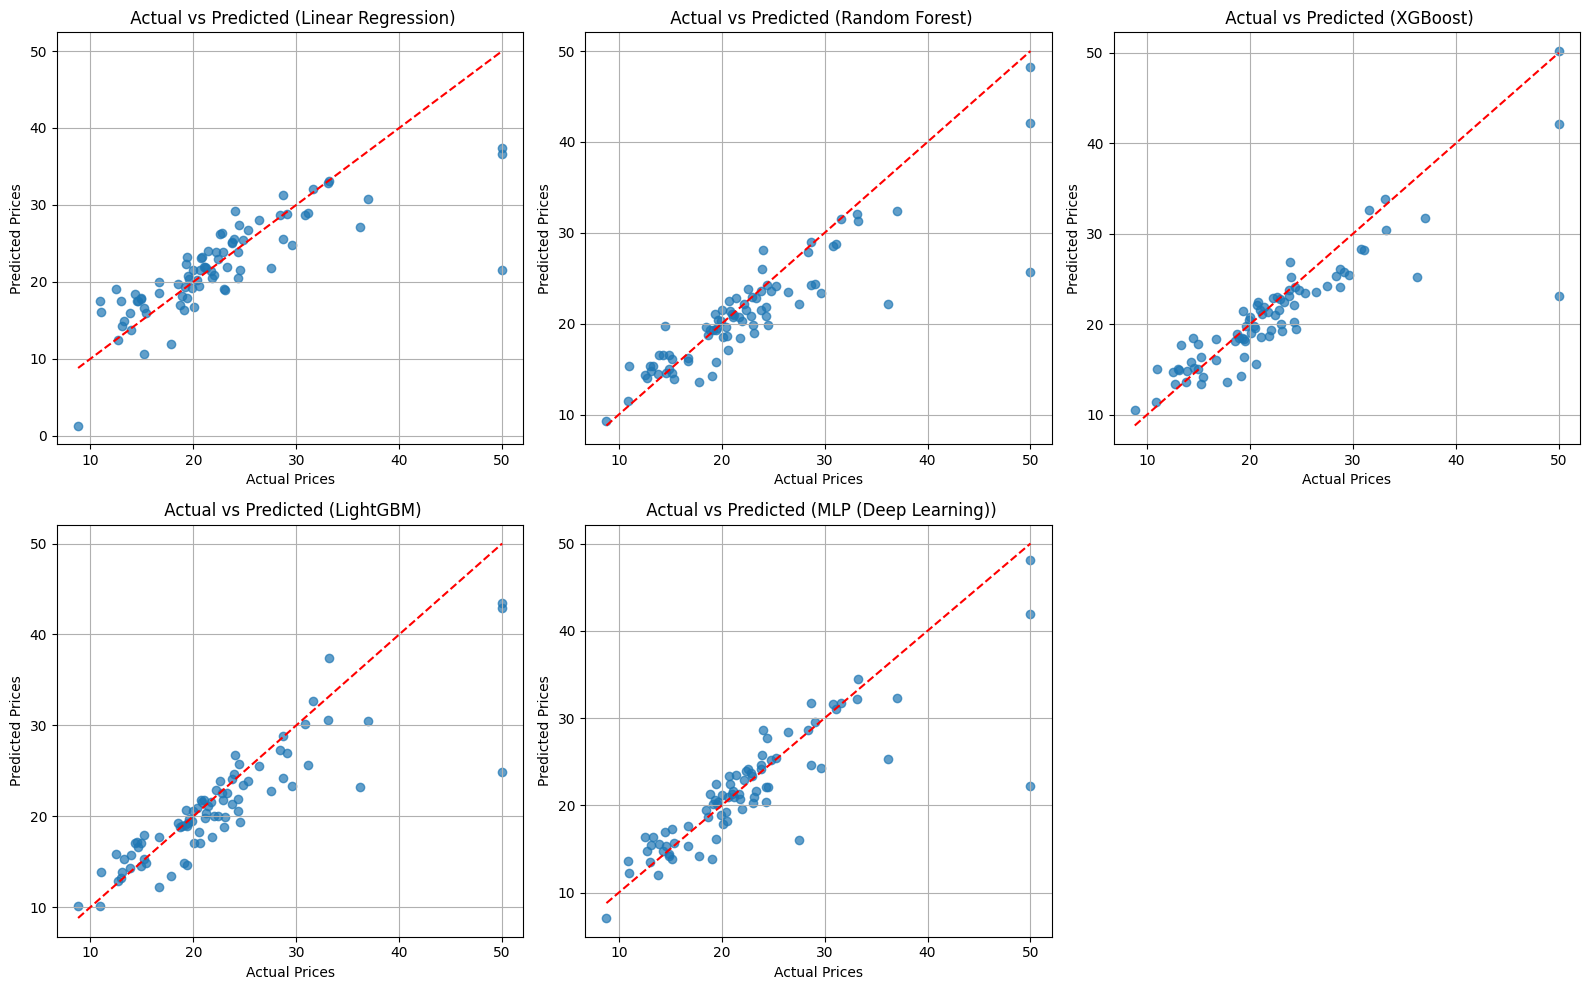

In [36]:
import matplotlib.pyplot as plt

y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_mlp = mlp_model.predict(X_test).flatten()

plt.figure(figsize=(16, 10))
predictions = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'LightGBM': y_pred_lgb,
    'MLP (Deep Learning)': y_pred_mlp
}

for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f" Actual vs Predicted ({model_name})")
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.grid(True)

plt.tight_layout()
plt.show()

📉 해석

🔹 Linear Regression
- 전반적으로 예측값이 실제값보다 과소/과대 예측되는 구간이 있으며, 예측 선형성이 부족함
- 고가 주택 예측에서 정확도가 떨어지는 모습

🔹 Random Forest
- 전반적으로 실제값과 유사한 예측을 보이며 직선 근처에 잘 분포
- 다만 일부 극단적인 고가 예측에서 소폭 벗어나는 경향 있음

🔹 XGBoost
- 예측값이 실제값과 거의 일치하며 높은 일관성을 보임
- 오차가 비교적 적고 분산도 낮은 편

🔹 LightGBM
- XGBoost와 유사하지만 일부 고가 구간에서의 오차가 더 큼
- 중간 가격대 예측은 안정적임

🔹 MLP (딥러닝)
- 비선형 패턴을 잘 포착하지만, 일부 고가 예측에서 정확도 떨어짐
- 전반적으로 직선 근처에 위치하며 준수한 예측 성능

➡️ XGBoost와 Random Forest는 가장 안정적으로 예측을 수행함

➡️ Linear Regression은 단순 모델이라 복잡한 패턴을 잘 잡지 못함

➡️ MLP는 전체적으로 잘 따르지만, 고가 예측에서 다소 흔들림 있음